#                                      Telecom Churn Case Study

# Problem Statement

Telecom companies needs to predict which customers are at high risk of churn to reduce customer churn.
In this project we will analyse customer level data of a leading telecom firm and try to build predictive models to identify customers at high risk of churn and identify the main indicators of churn

# Steps to create model

1. Reading understanding and visualising the data
2. EDA
3. Preparing the data for modeling (train-test split)
4. Training the model
5. Building the model
6. Evaluating the model

In [333]:
# Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

# Reading the data

In [334]:
# Reading the data

tel_chrn = pd.read_csv('telecom_churn_data.csv')
tel_chrn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [335]:
tel_chrn.shape

(99999, 226)

In [336]:
tel_chrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [337]:
tel_chrn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Checking and handling missing values

In [338]:
missing_values = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_values

,null
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
...,...
max_rech_amt_7,0.00
max_rech_amt_6,0.00
total_rech_amt_9,0.00
total_rech_amt_8,0.00


In [339]:
#checking the columns having missing values more than 40%
missing_columns_30 = list(missing_values.index[missing_values['null'] > 40])
missing_columns_30

['arpu_3g_6',
 'night_pck_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'max_rech_data_6',
 'fb_user_6',
 'av_rech_amt_data_6',
 'date_of_last_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'fb_user_7',
 'max_rech_data_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'total_rech_data_9',
 'count_rech_3g_9',
 'fb_user_9',
 'max_rech_data_9',
 'arpu_3g_9',
 'date_of_last_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'count_rech_2g_9',
 'av_rech_amt_data_9',
 'total_rech_data_8',
 'arpu_3g_8',
 'fb_user_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'max_rech_data_8',
 'count_rech_3g_8',
 'arpu_2g_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8']

In [340]:
# Deleting the columns having missing values more than 40%

tel_chrn = tel_chrn.drop(missing_columns_30, axis=1)

In [341]:
# Checking the shape after deleting the columns

tel_chrn.shape

(99999, 186)

Checking for high value customers

In [342]:
# Creating a single column called averg_amnt by adding two columns of 6 and 7

tel_chrn['averg_amnt'] = (tel_chrn['total_rech_amt_6'] + tel_chrn['total_rech_amt_7'])/2

In [343]:
# Finding the 70th percentile

percentile_70 = tel_chrn['averg_amnt'].quantile(0.7)
percentile_70

368.5

In [344]:
# Filtering those customers who have recharged more than 70 percentile

tel_chrn = tel_chrn[tel_chrn['averg_amnt'] >= percentile_70]
tel_chrn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [345]:
#checking the rows having missing values more than 50%

missing_rows_50 = tel_chrn[(tel_chrn.isnull().sum(axis=1)) > (len(tel_chrn.columns)//2)]
missing_rows_50.shape

(114, 187)

In [346]:
# Deleting all the rows having missing values more than 50%

tel_chrn = tel_chrn.drop(missing_rows_50.index)
tel_chrn.shape

(29897, 187)

In [347]:
missing_columns = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
loc_og_t2m_mou_9,5.32
loc_ic_t2f_mou_9,5.32
roam_og_mou_9,5.32
loc_og_t2t_mou_9,5.32
std_ic_t2m_mou_9,5.32
...,...
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00


In [348]:
# Listing all the columns of mou

print(((missing_columns[missing_columns['null'] == 5.32]).index).to_list())

['loc_og_t2m_mou_9', 'loc_ic_t2f_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2t_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_ic_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_ic_mou_9', 'loc_ic_t2m_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'loc_ic_t2t_mou_9', 'std_og_t2c_mou_9', 'og_others_9', 'std_og_mou_9', 'spl_og_mou_9', 'std_ic_t2f_mou_9', 'isd_og_mou_9', 'isd_ic_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'offnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'onnet_mou_9']


In [349]:
# Creating a df for all the columns having nulls of MOU

mou_null_9 = tel_chrn[(tel_chrn['loc_og_t2m_mou_9'].isnull()) & (tel_chrn['loc_og_t2t_mou_9'].isnull()) & (tel_chrn['loc_og_t2c_mou_9'].isnull()) & (tel_chrn['loc_ic_t2m_mou_9'].isnull()) &
  (tel_chrn['std_og_t2c_mou_9'].isnull()) & (tel_chrn['std_ic_t2f_mou_9'].isnull()) & (tel_chrn['isd_ic_mou_9'].isnull()) & (tel_chrn['spl_ic_mou_9'].isnull()) &
  (tel_chrn['ic_others_9'].isnull()) & (tel_chrn['isd_og_mou_9'].isnull()) & (tel_chrn['og_others_9'].isnull()) & (tel_chrn['std_og_t2m_mou_9'].isnull()) &
  (tel_chrn['loc_og_mou_9'].isnull()) & (tel_chrn['std_ic_t2t_mou_9'].isnull()) & (tel_chrn['loc_ic_t2f_mou_9'].isnull()) & (tel_chrn['loc_og_t2f_mou_9'].isnull()) & 
  (tel_chrn['std_og_t2t_mou_9'].isnull()) & (tel_chrn['loc_ic_t2t_mou_9'].isnull()) & (tel_chrn['std_og_mou_9'].isnull()) & (tel_chrn['std_ic_mou_9'].isnull()) & 
  (tel_chrn['std_ic_t2o_mou_9'].isnull()) & (tel_chrn['onnet_mou_9'].isnull()) & (tel_chrn['offnet_mou_9'].isnull()) & (tel_chrn['spl_og_mou_9'].isnull()) & 
  (tel_chrn['std_og_t2f_mou_9'].isnull()) & (tel_chrn['roam_ic_mou_9'].isnull()) & (tel_chrn['loc_ic_mou_9'].isnull()) & (tel_chrn['roam_og_mou_9'].isnull()) & 
  (tel_chrn['std_ic_t2m_mou_9'].isnull())]

mou_null_9.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,374.863,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,596.301,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,695.609,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,109,0.0,0.0,0.0,6/30/2014,7/31/2014,NaN,NaN,734.641,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [350]:
# Deleting mou null 

tel_chrn = tel_chrn.drop(mou_null_9.index)

In [351]:
# After deleting checking the missing values

missing_columns = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
date_of_last_rech_8,1.08
date_of_last_rech_9,1.04
loc_og_mou_8,0.55
std_og_t2m_mou_8,0.55
roam_ic_mou_8,0.55
...,...
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_9,0.00
spl_og_mou_9,0.00


In [352]:
# Checking the mou aug-8

print(((missing_columns[missing_columns['null'] == 0.55]).index).to_list())

['loc_og_mou_8', 'std_og_t2m_mou_8', 'roam_ic_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2m_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'og_others_8', 'loc_og_t2t_mou_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'isd_og_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2c_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'loc_og_t2m_mou_8', 'ic_others_8', 'std_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2o_mou_8', 'std_ic_t2t_mou_8', 'isd_ic_mou_8', 'onnet_mou_8', 'offnet_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8', 'spl_ic_mou_8']


In [353]:
# Creating a df for mou-8

mou_null_8 = tel_chrn[(tel_chrn['loc_og_t2m_mou_8'].isnull()) & (tel_chrn['loc_og_t2t_mou_8'].isnull()) & (tel_chrn['loc_og_t2c_mou_8'].isnull()) & (tel_chrn['loc_ic_t2m_mou_8'].isnull()) &
  (tel_chrn['spl_ic_mou_8'].isnull()) & (tel_chrn['isd_ic_mou_8'].isnull()) & (tel_chrn['std_ic_t2f_mou_8'].isnull()) & (tel_chrn['std_og_t2c_mou_8'].isnull()) &
  (tel_chrn['std_og_t2m_mou_8'].isnull()) & (tel_chrn['loc_og_mou_8'].isnull()) & (tel_chrn['std_ic_t2t_mou_8'].isnull()) & (tel_chrn['loc_ic_t2f_mou_8'].isnull()) &
  (tel_chrn['roam_og_mou_8'].isnull()) & (tel_chrn['ic_others_8'].isnull()) & (tel_chrn['isd_og_mou_8'].isnull()) & (tel_chrn['og_others_8'].isnull()) & 
  (tel_chrn['std_og_mou_8'].isnull()) & (tel_chrn['loc_ic_t2t_mou_8'].isnull()) & (tel_chrn['std_og_t2t_mou_8'].isnull()) & (tel_chrn['loc_og_t2f_mou_8'].isnull()) & 
  (tel_chrn['loc_ic_mou_8'].isnull()) & (tel_chrn['std_ic_t2m_mou_8'].isnull()) & (tel_chrn['std_ic_t2o_mou_8'].isnull()) & (tel_chrn['std_ic_mou_8'].isnull()) & 
  (tel_chrn['offnet_mou_8'].isnull()) & (tel_chrn['spl_og_mou_8'].isnull()) & (tel_chrn['std_og_t2f_mou_8'].isnull()) & (tel_chrn['roam_ic_mou_8'].isnull()) & 
  (tel_chrn['onnet_mou_8'].isnull())]

mou_null_8.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt
375,7002252754,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,580.477,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,569.612,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,532.742,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,810.455,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,649.150,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [354]:
# Deleting mou null-8

tel_chrn = tel_chrn.drop(mou_null_8.index)

In [355]:
# After deleting checking the missing values

missing_columns = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
date_of_last_rech_9,1.02
date_of_last_rech_8,1.01
loc_og_t2t_mou_6,0.44
loc_og_t2f_mou_6,0.44
loc_og_t2c_mou_6,0.44
...,...
std_og_mou_8,0.00
std_og_t2c_mou_9,0.00
std_og_t2c_mou_8,0.00
std_og_t2f_mou_9,0.00


In [356]:
# Checking the mou jun-6

print(((missing_columns[missing_columns['null'] == 0.44]).index).to_list())

['loc_og_t2t_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'ic_others_6', 'loc_ic_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'spl_ic_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'onnet_mou_6']


In [357]:
# Creating a df for mou-jun -6

mou_null_6 = tel_chrn[(tel_chrn['loc_ic_t2m_mou_6'].isnull()) & (tel_chrn['loc_og_t2c_mou_6'].isnull()) & (tel_chrn['loc_og_t2t_mou_6'].isnull()) & (tel_chrn['loc_og_t2m_mou_6'].isnull()) &
  (tel_chrn['spl_ic_mou_6'].isnull()) & (tel_chrn['isd_ic_mou_6'].isnull()) & (tel_chrn['std_ic_t2f_mou_6'].isnull()) & (tel_chrn['std_og_t2c_mou_6'].isnull()) &
  (tel_chrn['loc_og_mou_6'].isnull()) & (tel_chrn['std_og_t2m_mou_6'].isnull()) & (tel_chrn['std_ic_t2t_mou_6'].isnull()) & (tel_chrn['loc_ic_t2f_mou_6'].isnull()) &
  (tel_chrn['roam_og_mou_6'].isnull()) & (tel_chrn['ic_others_6'].isnull()) & (tel_chrn['isd_og_mou_6'].isnull()) & (tel_chrn['og_others_6'].isnull()) & 
  (tel_chrn['std_og_mou_6'].isnull()) & (tel_chrn['loc_ic_t2t_mou_6'].isnull()) & (tel_chrn['std_og_t2t_mou_6'].isnull()) & (tel_chrn['loc_og_t2f_mou_6'].isnull()) & 
  (tel_chrn['std_ic_t2m_mou_6'].isnull()) & (tel_chrn['onnet_mou_6'].isnull()) & (tel_chrn['std_ic_mou_6'].isnull()) & (tel_chrn['std_ic_t2o_mou_6'].isnull()) & 
  (tel_chrn['spl_og_mou_6'].isnull()) & (tel_chrn['std_og_t2f_mou_6'].isnull()) & (tel_chrn['roam_ic_mou_6'].isnull()) & (tel_chrn['loc_ic_mou_6'].isnull()) & 
  (tel_chrn['offnet_mou_6'].isnull())]

mou_null_6.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt
77,7001328263,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,30.000,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,213.802,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,48.000,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.000,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [358]:
# Deleting mou null jun - 6

tel_chrn = tel_chrn.drop(mou_null_6.index)

In [359]:
# After deleting checking the missing values

missing_columns = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
date_of_last_rech_9,1.02
date_of_last_rech_8,1.01
date_of_last_rech_7,0.20
og_others_7,0.12
spl_ic_mou_7,0.12
...,...
isd_og_mou_8,0.00
isd_og_mou_9,0.00
spl_og_mou_6,0.00
spl_og_mou_8,0.00


In [360]:
# Checking the mou jul-7

print(((missing_columns[missing_columns['null'] == 0.12]).index).to_list())

['og_others_7', 'spl_ic_mou_7', 'loc_og_t2m_mou_7', 'spl_og_mou_7', 'loc_og_t2f_mou_7', 'isd_ic_mou_7', 'isd_og_mou_7', 'loc_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'ic_others_7', 'std_og_mou_7', 'std_og_t2m_mou_7', 'std_og_t2c_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2o_mou_7', 'loc_ic_t2t_mou_7', 'onnet_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'offnet_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2f_mou_7']


In [361]:
# Creating a df for mou-jul-7

mou_null_7 = tel_chrn[(tel_chrn['loc_og_t2m_mou_7'].isnull()) & (tel_chrn['loc_ic_t2m_mou_7'].isnull()) & (tel_chrn['loc_og_t2c_mou_7'].isnull()) & (tel_chrn['loc_og_t2t_mou_7'].isnull()) &
  (tel_chrn['spl_ic_mou_7'].isnull()) & (tel_chrn['isd_ic_mou_7'].isnull()) & (tel_chrn['std_ic_t2f_mou_7'].isnull()) & (tel_chrn['std_og_t2c_mou_7'].isnull()) &
  (tel_chrn['std_og_t2m_mou_7'].isnull()) & (tel_chrn['og_others_7'].isnull()) & (tel_chrn['isd_og_mou_7'].isnull()) & (tel_chrn['ic_others_7'].isnull()) &
  (tel_chrn['loc_og_t2f_mou_7'].isnull()) & (tel_chrn['loc_ic_t2f_mou_7'].isnull()) & (tel_chrn['std_ic_t2t_mou_7'].isnull()) & (tel_chrn['loc_og_mou_7'].isnull()) & 
  (tel_chrn['std_ic_mou_7'].isnull()) & (tel_chrn['std_og_mou_7'].isnull()) & (tel_chrn['loc_ic_t2t_mou_7'].isnull()) & (tel_chrn['std_og_t2t_mou_7'].isnull()) & 
  (tel_chrn['roam_ic_mou_7'].isnull()) & (tel_chrn['loc_ic_mou_7'].isnull()) & (tel_chrn['roam_og_mou_7'].isnull()) & (tel_chrn['std_ic_t2o_mou_7'].isnull()) & 
  (tel_chrn['offnet_mou_7'].isnull()) & (tel_chrn['std_ic_t2m_mou_7'].isnull()) & (tel_chrn['spl_og_mou_7'].isnull()) & (tel_chrn['std_og_t2f_mou_7'].isnull()) & 
  (tel_chrn['onnet_mou_7'].isnull())]

mou_null_7.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt
5616,7001238202,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,760.815,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1129.566,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,925.028,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,894.818,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1803.475,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [362]:
# Deleting mou null jul - 7

tel_chrn = tel_chrn.drop(mou_null_7.index)

In [363]:
# After deleting checking the missing values

missing_columns = (round(((tel_chrn.isnull().sum()/len(tel_chrn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
date_of_last_rech_9,1.02
date_of_last_rech_8,1.01
date_of_last_rech_7,0.20
date_of_last_rech_6,0.10
std_ic_mou_9,0.00
...,...
std_og_t2c_mou_9,0.00
std_og_mou_6,0.00
std_og_mou_7,0.00
std_og_mou_8,0.00


In [364]:
# Deleting date columns as it is not required

columns_d = [k for k in tel_chrn.columns.to_list() if 'date' in k]
print(columns_d) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [365]:
# Deleting date columns
tel_chrn = tel_chrn.drop(columns_d, axis=1)


In [366]:
# Deleting circle_id column as well
tel_chrn = tel_chrn.drop('circle_id', axis=1)

# Tag Churn

In [367]:
tel_chrn['churn'] = np.where((tel_chrn['total_ic_mou_9']==0) & (tel_chrn['total_og_mou_9']==0) & (tel_chrn['vol_2g_mb_9']==0) & (tel_chrn['vol_3g_mb_9']==0), 1, 0)

In [368]:
tel_chrn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,averg_amnt,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [369]:
# Removing all the variables of churn phase

column_9 = [col for col in tel_chrn.columns.to_list() if '_9' in col]

In [370]:
# Removing churn columns months

tel_chrn = tel_chrn.drop(column_9, axis=1)

In [371]:
# Removing sep_vbc_3g column

tel_chrn = tel_chrn.drop('sep_vbc_3g', axis=1)

In [372]:
# Checking the churn %


round(100*(tel_chrn['churn'].mean()),2)

3.39

Treating Outliers

In [373]:
# Converting mobile_number and churn columns data type to object

tel_chrn['mobile_number'] = tel_chrn['mobile_number'].astype(object)
tel_chrn['churn'] = tel_chrn['churn'].astype(object)

In [374]:
# Listing only numeric columns

columns_num = tel_chrn.select_dtypes(exclude=['object']).columns
print(columns_num)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'averg_amnt'],
      dtype='object', length=134)


In [375]:
# Removing outliers

for column in columns_num: 
    q1 = tel_chrn[column].quantile(0.10)
    q3 = tel_chrn[column].quantile(0.90)
    iqr = q3-q1
    low_range  = q1-1.5*iqr
    high_range = q3+1.5*iqr
    final = tel_chrn.loc[(tel_chrn[column] > low_range) & (tel_chrn[column] < high_range)]

final.shape

(27705, 136)

In [376]:
# Deriving features of new 

[total for total in final.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

In [377]:
# Deriving another new column for checking volume based cost of the customer

final['avg_vbc_3g_action'] = (final['jul_vbc_3g'] + final['aug_vbc_3g'])/2
final['diff_vbc'] = final['avg_vbc_3g_action'] - final['jun_vbc_3g']
final['decrease_vbc_action'] = np.where(final['diff_vbc'] < 0 , 1, 0)
final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,averg_amnt,churn,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,0,315,21.03,910.65,122.16,519.0,0,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,2607,0.00,0.00,0.00,380.0,0,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,0,511,0.00,2.45,21.89,459.0,0,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0,667,0.00,0.00,0.00,408.0,0,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,720,0.00,0.00,0.00,640.0,0,0.000,0.000,0


In [378]:
# Deriving another new column for checking number of recharge of the customer

final['avg_rech_num_action'] = (final['total_rech_num_7'] + final['total_rech_num_8'])/2
final['diff_rech_num'] = final['avg_rech_num_action'] - final['total_rech_num_6']
final['decrease_rech_num_action'] = np.where((final['diff_rech_num'] < 0), 1, 0)
final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jul_vbc_3g,jun_vbc_3g,averg_amnt,churn,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,910.65,122.16,519.0,0,465.840,343.680,0,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,0.00,380.0,0,0.000,0.000,0,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,2.45,21.89,459.0,0,1.225,-20.665,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,0.00,408.0,0,0.000,0.000,0,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,0.00,640.0,0,0.000,0.000,0,26.5,4.5,0


In [379]:
# Derive new column for checking minutes of usage

final['total_mou_good'] = (final['total_og_mou_6'] + final['total_ic_mou_6'])
final['avg_mou_action'] = (final['total_og_mou_7'] + final['total_og_mou_8'] + final['total_ic_mou_7'] + final['total_ic_mou_8'])/2
final['diff_mou'] = final['avg_mou_action'] - final['total_mou_good']
final['decrease_mou_action'] = np.where((final['diff_mou'] < 0), 1, 0)
final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,avg_vbc_3g_action,diff_vbc,decrease_vbc_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,465.840,343.680,0,17.5,-1.5,1,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.000,0.000,0,7.5,1.5,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1.225,-20.665,1,4.0,-6.0,1,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.000,0.000,0,3.0,-16.0,1,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.000,0.000,0,26.5,4.5,0,1067.43,1245.130,177.700,0


In [380]:
# Deriving another new column for checking the average revenue per customer

final['avg_arpu_action'] = (final['arpu_7'] + final['arpu_8'])/2
final['diff_arpu'] = final['avg_arpu_action'] - final['arpu_6']
final['decrease_arpu_action'] = np.where(final['diff_arpu'] < 0, 1, 0)
final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,17.5,-1.5,1,612.22,324.125,-288.095,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,7.5,1.5,0,1875.70,1262.390,-613.310,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,4.0,-6.0,1,711.67,597.705,-113.965,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,3.0,-16.0,1,1341.41,1.560,-1339.850,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,26.5,4.5,0,1067.43,1245.130,177.700,0,617.7565,103.3035,0


In [381]:
# Deriving another new column for checking amount of recharge of the customer

final['avg_rech_amt_action'] = (final['total_rech_amt_7'] + final['total_rech_amt_8'])/2
final['diff_rech_amt'] = final['avg_rech_amt_action'] - final['total_rech_amt_6']
final['decrease_rech_amt_action'] = np.where((final['diff_rech_amt'] < 0), 1, 0) 
final.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,314.7925,-63.9285,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,399.4655,-93.3805,1,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,243.8815,-187.0935,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,22.2395,-667.7685,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,617.7565,103.3035,0,699.0,99.0,0


# Exploratory Data Analysis

Univariate Analysis

In [382]:
# creating a new df called churn and not_churn to analyse further

churn = final[final['churn'] == 1]
not_churn = final[final['churn'] == 0]

[Text(0.5, 0, 'MOU action phase')]

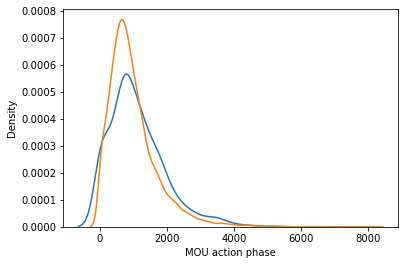

In [383]:
# Distribution plot
L1 = sns.distplot(churn['total_mou_good'],label='churn',hist=False)
L1 = sns.distplot(not_churn['total_mou_good'],label='not churn',hist=False)
L1.set(xlabel='MOU action phase')

Here we can see tht minutes of usage is distributed between 0 to 2000 range, which means increase the mou lesser the churn 
rate

[Text(0.5, 0, 'ARPU action phase')]

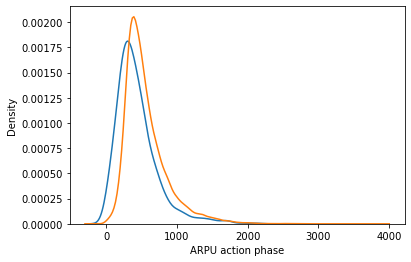

In [384]:
# Distribution plot
L1 = sns.distplot(churn['avg_arpu_action'],label='churn',hist=False)
L1 = sns.distplot(not_churn['avg_arpu_action'],label='not churn',hist=False)
L1.set(xlabel='ARPU action phase')

1. Churn rate is distributed between 0 to 1500 which means the higher arpu the lesser churn rate
2. not churn rate is distributed between 0 to 1000

In [385]:
# Converting churn column into integer type to analyse the data

final['churn'] = final['churn'].astype('int64')

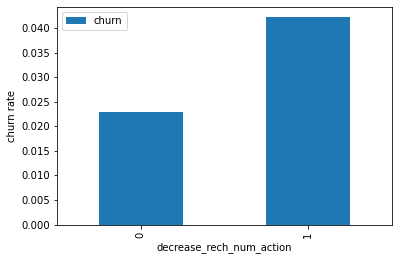

In [386]:
final.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we can see the churn rate is high for those customers whose number of recharge is low in the action phase where the number of recharge is high in good phase

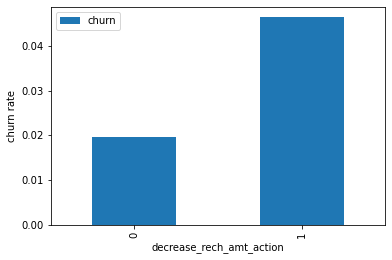

In [387]:
final.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here also we can see the churn rate is high for those customers whose number of recharge is low in the action phase where the number of recharge is high in good phase

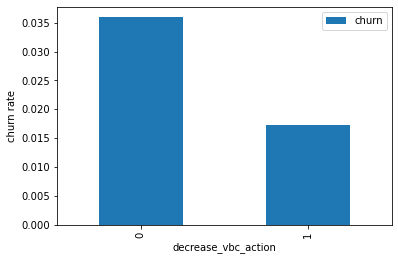

In [388]:
final.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we can see that the customer wont rechage more when they are in action phase

Bivariate Analysis

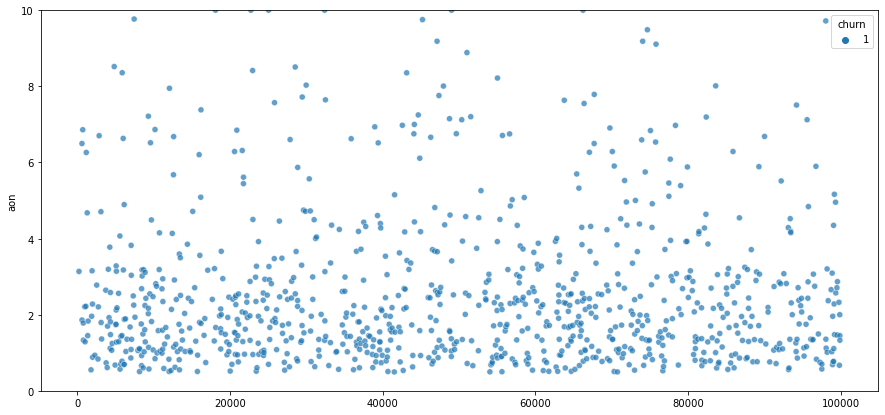

In [389]:
# Checking the scatted plot

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn['aon'] / 365, x=churn.index, hue=churn.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

Here we can see the churn rate is more in less than 4 years

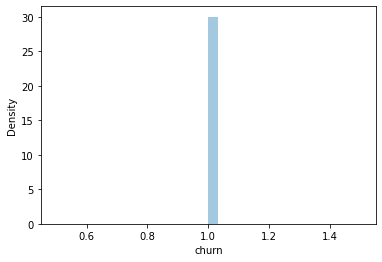

In [390]:
# Checking the scatter plot for revenue

sns.distplot(churn['churn'])
plt.show()

In [391]:
final = final.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc',], axis=1)

# Train-Test split

In [392]:
X = final.drop(['mobile_number','churn'], axis=1)
y = final['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=99)

In [393]:
# Handling imbalance

sm = SMOTE(random_state=48)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Feature Scaling

In [394]:
scaler = StandardScaler()

In [395]:
# Removing binary columns
scale_col = X_train.columns.to_list()
scale_col.remove('decrease_mou_action')
scale_col.remove('decrease_rech_num_action')
scale_col.remove('decrease_rech_amt_action')
scale_col.remove('decrease_arpu_action')
scale_col.remove('decrease_vbc_action')

In [396]:
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

In [397]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,averg_amnt,decrease_vbc_action,decrease_rech_num_action,decrease_mou_action,decrease_arpu_action,decrease_rech_amt_action
0,0.0,0.0,0.0,-0.832084,0.693737,0.627345,-0.648386,-0.658931,-0.507425,-0.386671,...,-0.510755,2.792067,3.620007,2.929158,-0.105437,0,0,0,0,0
1,0.0,0.0,0.0,-0.599808,-1.067560,0.284650,-0.681301,-0.667507,-0.435747,-0.836724,...,-0.723340,-0.087557,0.262485,0.369967,-0.986107,1,1,0,1,1
2,0.0,0.0,0.0,-0.208772,-0.942424,0.437014,-0.737837,-0.678244,-0.488605,-0.700665,...,1.710351,-0.256116,-0.269185,-0.265994,-0.774746,0,1,0,1,0
3,0.0,0.0,0.0,-0.219510,-0.186490,0.537411,0.638918,1.328513,1.932389,-0.628280,...,0.118868,-0.256116,-0.269185,-0.265994,-0.207763,0,0,0,0,0
4,0.0,0.0,0.0,0.278025,0.233779,-0.125679,-0.056299,-0.289541,-0.159833,0.211872,...,-0.032149,0.033185,0.019381,-0.139448,-0.073566,0,1,1,1,1


Scaling the test set

In [398]:
# Transforming the test set
X_test[scale_col] = scaler.transform(X_test[scale_col])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,averg_amnt,decrease_vbc_action,decrease_rech_num_action,decrease_mou_action,decrease_arpu_action,decrease_rech_amt_action
90180,0.0,0.0,0.0,0.483864,0.512425,0.672512,-0.194748,-0.048800,-0.008680,-0.218694,...,2.256335,-0.063203,0.709360,-0.217360,0.372640,0,0,0,1,0
65005,0.0,0.0,0.0,-0.959007,-0.618700,-0.270215,-0.658469,-0.632707,-0.476359,-0.070673,...,-0.839507,-0.256116,-0.269185,-0.265994,-0.174214,0,1,1,0,1
11456,0.0,0.0,0.0,-0.536358,-0.935928,-0.800586,-0.776935,-0.720571,-0.558609,-0.483102,...,-0.777939,-0.256116,0.613822,-0.265994,-0.925718,0,1,1,1,1
28315,0.0,0.0,0.0,-1.174523,0.000020,1.139201,-0.752749,-0.723060,-0.532167,-0.664105,...,-0.831375,2.814948,1.004998,1.794890,-0.900556,0,0,0,0,0
24357,0.0,0.0,0.0,-0.018016,1.091512,1.675941,0.280388,1.055070,2.781374,-0.562828,...,-0.387619,-0.256116,-0.269185,-0.265994,0.552129,0,0,0,0,0


# PCA Model

In [399]:
pca = PCA(random_state=99)

In [400]:
pca.fit(X_train)

PCA(random_state=99)

In [401]:
pca.components_

array([[ 1.44356370e-19, -2.77555756e-17, -2.22044605e-16, ...,
        -2.30105346e-02, -2.56745354e-02, -2.54253435e-02],
       [-2.81538874e-19,  1.11022302e-16, -0.00000000e+00, ...,
        -5.19273947e-03, -5.49048427e-03, -4.96524946e-03],
       [ 9.64944830e-19,  5.55111512e-16, -1.66533454e-16, ...,
        -4.94839817e-02, -4.70262060e-02, -4.61227847e-02],
       ...,
       [ 0.00000000e+00,  1.80502882e-01, -2.24087412e-02, ...,
         9.88792381e-17,  2.15105711e-16, -1.11022302e-16],
       [-0.00000000e+00, -2.17544462e-01, -4.91115805e-02, ...,
         4.85722573e-17, -6.93889390e-18, -5.20417043e-18],
       [ 9.99999134e-01, -3.70074380e-04,  1.25609237e-03, ...,
         3.44911816e-18, -9.60535362e-19, -7.26754269e-19]])

In [402]:
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.11268126 0.19566514 0.24764495 0.29146916 0.33143321 0.36902034
 0.40551634 0.43601879 0.46118225 0.48595636 0.50855688 0.53038207
 0.55126287 0.57126131 0.58954862 0.60697529 0.6230848  0.63853299
 0.65286341 0.66626978 0.67931963 0.69212373 0.70359194 0.71456283
 0.72522484 0.7350879  0.7446999  0.75422894 0.76355742 0.77235172
 0.78075467 0.78866967 0.79639821 0.8038986  0.81114683 0.81793819
 0.82456241 0.83109435 0.83733675 0.84312925 0.84876812 0.8542343
 0.85961891 0.86489736 0.87004405 0.87509521 0.87974187 0.88412093
 0.88834527 0.89246752 0.89641554 0.90019939 0.9039285  0.9076084
 0.91121558 0.91472451 0.91813978 0.92142598 0.92452004 0.92758208
 0.93058065 0.9335406  0.93641262 0.9391855  0.94191481 0.94458747
 0.94716886 0.94973432 0.95224238 0.95458266 0.95691212 0.95920011
 0.96146374 0.96369356 0.96581768 0.96785942 0.96976978 0.9715913
 0.97338633 0.97513878 0.97683869 0.97848721 0.98007588 0.98165691
 0.9832314  0.98472373 0.98620534 0.98764278 0.98892758 0.9901514

Text(0, 0.5, 'Variance')

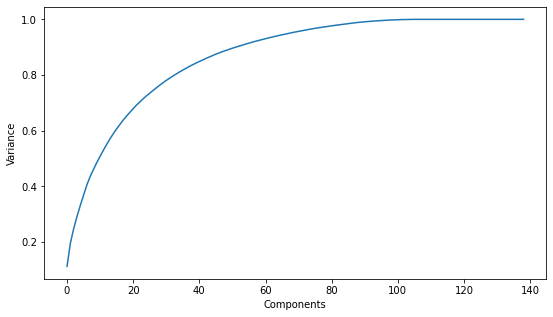

In [403]:
# Scree plot

fig = plt.figure(figsize = (9,5))
plt.plot(variance_cumu)
plt.xlabel('Components')
plt.ylabel('Variance')

Here we can see that 60 components explain more than 90% of the data hence performing pca with 60 components

In [404]:
final_pca = IncrementalPCA(n_components=60)

In [405]:
# Fitting and transforming the x_train

X_train_pca = final_pca.fit_transform(X_train)

In [406]:
# Apply transform on the test set

X_test_pca = final_pca.transform(X_test)

# Logistic Regression

In [407]:
# Create KFold object with 5 splits
fold = KFold(n_splits=5, shuffle=True, random_state=99)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
cv_model = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = fold, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
cv_model.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=99, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [408]:
results_cv = pd.DataFrame(cv_model.cv_results_)
results_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.217021,0.020406,0.005583,0.002239,0.01,{'C': 0.01},0.894882,0.885338,0.887939,0.898002,...,0.893087,0.005517,6,0.891210,0.895632,0.892619,0.893541,0.893346,0.893270,0.001437
1,0.392152,0.020218,0.004586,0.000488,0.1,{'C': 0.1},0.895113,0.887923,0.890018,0.899177,...,0.894442,0.004808,5,0.893493,0.897670,0.893964,0.895347,0.895092,0.895113,0.001452
2,0.423860,0.024085,0.005185,0.001465,1,{'C': 1},0.895343,0.890038,0.889787,0.899647,...,0.894911,0.004381,1,0.893961,0.897496,0.893906,0.895813,0.895383,0.895312,0.001329
3,0.415291,0.017352,0.006381,0.002149,10,{'C': 10},0.895574,0.890273,0.889787,0.899177,...,0.894816,0.004132,3,0.893785,0.897204,0.893672,0.895463,0.895209,0.895067,0.001291
4,0.413294,0.017025,0.004190,0.000397,100,{'C': 100},0.895113,0.890508,0.889556,0.899177,...,0.894678,0.004075,4,0.893668,0.897146,0.893847,0.895580,0.895209,0.895090,0.001269
5,0.405509,0.010291,0.005583,0.001740,1000,{'C': 1000},0.895113,0.890742,0.889556,0.899647,...,0.894866,0.004184,2,0.893727,0.897204,0.893964,0.895987,0.895209,0.895218,0.001291


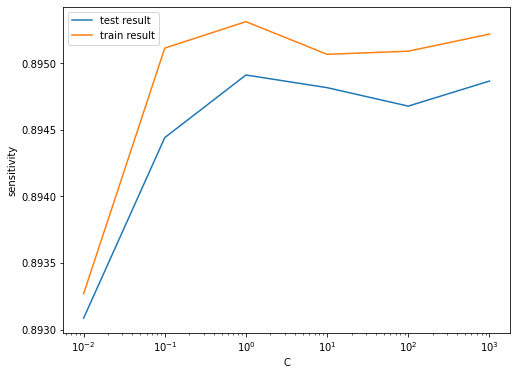

In [409]:
# Plotting C versus validation and train scores 

plt.figure(figsize=(8, 6))
plt.plot(results_cv['param_C'], results_cv['mean_test_score'])
plt.plot(results_cv['param_C'], results_cv['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [410]:
best_score = cv_model.best_score_
best_C = cv_model.best_params_['C']

print(" The sensitivity is {0} at C = {1}".format(best_score, best_C))

 The sensitivity is 0.8949114180084677 at C = 1


# Logistic regression using optimal C

In [411]:
pca_logistic = LogisticRegression(C=best_C)
pca_log_model = pca_logistic.fit(X_train_pca, y_train)

Evaluating on train data set

In [412]:
y_train_pred = pca_log_model.predict(X_train_pca)

In [413]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[17722  3704]
 [ 2246 19180]]


In [414]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [415]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8611500046672267
Sensitivity:- 0.8951740875571735
Specificity:- 0.82712592177728


Prediction on the test data set

In [416]:
y_test_pred = pca_log_model.predict(X_test_pca)

In [417]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4428  919]
 [  28  166]]


In [418]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [419]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8290922216206461
Sensitivity:- 0.8556701030927835
Specificity:- 0.8281279221993642


Summary

Train set
 1. Accuracy = 0.86
 2. Sensitivity = 0.89
 3. Specificity = 0.83
 
Test set
 1. Accuracy = 0.83
 2. Sensitivity = 0.85
 3. Specificity = 0.83

# Without pca

In [420]:
import statsmodels.api as sm
no_log_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [421]:
no_log_pca = no_log_pca.fit().summary()

In [422]:
# Checking the summary of the model

no_log_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42852
Model:                            GLM   Df Residuals:                    42721
Model Family:                Binomial   Df Model:                          130
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 04 Oct 2022   Deviance:                   1.7859e+05
Time:                        11:50:04   Pearson chi2:                 8.73e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     3.844e+14   8.14e+05   4.72e+08      0.000    3.84e+14    3.84e+14
loc_og_t2o_mou            1.096e+07      0.241   4.56e+07      0.000     1.1e+07     1.1e+07
std_og_t2o_mou            2.174e+07      1.471   1.48e+07      0.000    2.17e+07    2.17e+07
loc_ic_t2o_mou            9.975e+07      1.856   5.38e+07      0.000    9.98e+07    9.98e+07
arpu_6                   -2.373e+13   1.21e+06  -1.96e+07      0.000   -2.37e+13   -2.37e+13
arpu_7                   -2.459e+13   1.34e+06  -1.84e+07      0.000   -2.46e+13   -2.46e+13
arpu_8                    3.287e+13   1.54e+06   2.13e+07      0.000    3.29e+13    3.29e+13
onnet_mou_6               2.065e+15   5.32e+07   3.88e+07      0.000    2.06e+15    2.06e+15
onnet_mou_7              -2.451e+14   3.29e+07  -7.45e+06      0.000   -2.45e+14   -2.45e+14
onnet_mou_8                9.87e+14   2.26e+07   4.37e+07      0.000    9.87e+14    9.87e+14
offnet_mou_6              1.984e+15   5.24e+07   3.79e+07      0.000    1.98e+15    1.98e+15
offnet_mou_7             -1.171e+14   3.11e+07  -3.77e+06      0.000   -1.17e+14   -1.17e+14
offnet_mou_8              1.076e+15   2.27e+07   4.75e+07      0.000    1.08e+15    1.08e+15
roam_ic_mou_6             7.228e+11   6.17e+05   1.17e+06      0.000    7.23e+11    7.23e+11
roam_ic_mou_7             1.022e+13   7.12e+05   1.43e+07      0.000    1.02e+13    1.02e+13
roam_ic_mou_8             2.061e+13   6.28e+05   3.28e+07      0.000    2.06e+13    2.06e+13
roam_og_mou_6            -6.108e+14   1.66e+07  -3.68e+07      0.000   -6.11e+14   -6.11e+14
roam_og_mou_7             4.408e+13   8.36e+06   5.27e+06      0.000    4.41e+13    4.41e+13
roam_og_mou_8            -3.287e+14   7.15e+06  -4.59e+07      0.000   -3.29e+14   -3.29e+14
loc_og_t2t_mou_6         -3.948e+17   1.16e+10   -3.4e+07      0.000   -3.95e+17   -3.95e+17
loc_og_t2t_mou_7         -2.401e+17    1.2e+10     -2e+07      0.000    -2.4e+17    -2.4e+17
loc_og_t2t_mou_8          5.234e+17   1.18e+10   4.45e+07      0.000    5.23e+17    5.23e+17
loc_og_t2m_mou_6         -4.228e+17   1.24e+10   -3.4e+07      0.000   -4.23e+17   -4.23e+17
loc_og_t2m_mou_7          -2.38e+17   1.19e+10     -2e+07      0.000   -2.38e+17   -2.38e+17
loc_og_t2m_mou_8          5.644e+17   1.27e+10   4.45e+07      0.000    5.64e+17    5.64e+17
loc_og_t2f_mou_6         -3.572e+16   1.05e+09   -3.4e+07      0.000   -3.57e+16   -3.57e+16
loc_og_t2f_mou_7         -2.044e+16   1.02e+09  -2.01e+07      0.000   -2.04e+16   -2.04e+16
loc_og_t2f_mou_8          4.711e+16   1.06e+09   4.45e+07      0.000    4.71e+16    4.71e+16
loc_og_t2c_mou_6         -1.787e+12   4.43e+05  -4.03e+06      0.000   -1.79e+12   -1.79e+12
loc_og_t2c_mou_7          2.967e+12   4.68e+05   6.33e+06      0.000    2.97e+12    2.97e+12
loc_og_t2c_mou

# RFE

In [423]:
reglog = LogisticRegression()

In [ ]:
# Importing RFE
from sklearn.feature_selection import RFE

# selecting 25 variables
rfe = RFE(reglog, n_features_to_select=15)

# Fitting the model
rfe = rfe.fit(X_train, y_train)

In [ ]:
#Columns selected by RFE
cols_rfe = X_train.columns[rfe.support_]
print(cols_rfe)

In [ ]:
# Constrain adding

X_train_1 = sm.add_constant(X_train[cols_rfe])
no_log_pca_1 = sm.GLM(y_train, X_train_1, family=sm.families.Binomial())
no_log_pca_1 = no_log_pca_1.fit()
no_log_pca_1.summary()

Checking the VIF values

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_rfe].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_rfe].values, i) for i in range(X_train[cols_rfe].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Deleting the og_others_8 as its values are not specifying
cols_logs = cols_rfe.to_list()
cols_logs.remove('og_others_8')
print(cols_logs)

In [ ]:
X_train_2 = sm.add_constant(X_train[cols_logs])
no_log_pca_2 = sm.GLM(y_train, X_train_2, family=sm.families.Binomial())
no_log_pca_2 = no_log_pca_2.fit()
no_log_pca_2.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_logs].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_logs].values, i) for i in range(X_train[cols_logs].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Deleting total_og_mou_8 column as it has high VIF
cols_logs.remove('total_og_mou_8')

In [ ]:
X_train_3 = sm.add_constant(X_train[cols_logs])
no_log_pca_3 = sm.GLM(y_train, X_train_3, family=sm.families.Binomial())
no_log_pca_3 = no_log_pca_3.fit()
no_log_pca_3.summary()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols_logs].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols_logs].values, i) for i in range(X_train[cols_logs].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

We can see all the variables has vif less than 5 and p value less than 0.05 hence these are the top variables

Evaluating model on the train data set

In [ ]:
y_train_pred_pca_no = no_log_pca_3.predict(X_train_3)
y_train_pred_pca_no.head()

In [ ]:
# Creating new df

final_y_train_pred = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_pca_no.values})
final_y_train_pred['CustID'] = final_y_train_pred.index
final_y_train_pred.head()

# Optimal Curve

In [ ]:
cutoff_prob = [float(p/10) for p in range(10)]

for i in cutoff_prob:
    final_y_train_pred[i] = final_y_train_pred['churn_prob'].map(lambda x : 1 if x > i else 0)
    
final_y_train_pred.head()

Calculating accuracy sensitivity and specificity

In [ ]:
df_cutoff = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in cutoff_prob:
    L1 = metrics.confusion_matrix(final_y_train_pred['churn'], final_y_train_pred[i] )
    total1=sum(sum(L1))
    accuracy = (L1[0,0]+L1[1,1])/total1
    
    specificity = L1[0,0]/(L1[0,0]+L1[0,1])
    sensitivity = L1[1,1]/(L1[1,0]+L1[1,1])
    df_cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(df_cutoff)

Plotting optimal curve

In [ ]:
df_cutoff.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Here at 0.6 the three parameters cut each other

In [ ]:
# Creating a column with the cutt off greater than 0.5

final_y_train_pred['predicted'] = final_y_train_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
final_y_train_pred.head()

In [ ]:
# Confusion metrics

confusion = metrics.confusion_matrix(final_y_train_pred['churn'], final_y_train_pred['predicted'])
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Accuracy:-",metrics.accuracy_score(final_y_train_pred['churn'], final_y_train_pred['predicted']))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# ROC plotting between sensitivity and specificity

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc(final_y_train_pred['churn'], final_y_train_pred['churn_prob'])

# Evaluating model on test data set

In [ ]:
log_X_test = X_test.copy()
log_X_test = log_X_test[cols_logs]
X_test_na = sm.add_constant(log_X_test)

In [ ]:
# Prediction on test data det

y_test_pred = no_log_pca_3.predict(X_test_na)

In [ ]:
# Creating a new df

y_pred_na = pd.DataFrame(y_test_pred)
y_pred_na.head()

In [ ]:
# Converting y test to a dataframe

df_y_test = pd.DataFrame(y_test)
df_y_test.head()

In [ ]:
# Alotting index into cust_id

df_y_test['CustID'] = df_y_test.index
y_pred_na.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)
final_y_test_pred = pd.concat([df_y_test, y_pred_na], axis=1)
final_y_test_pred.head()

In [ ]:
# Renaming column

final_y_test_pred = final_y_test_pred.rename(columns={0:'churn_prob'})
final_y_test_pred.head()

In [ ]:
final_y_test_pred['test_predicted'] = final_y_test_pred['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
final_y_test_pred.head()

In [ ]:
# Confusion matrix

confusion = metrics.confusion_matrix(final_y_test_pred['churn'], final_y_test_pred['test_predicted'])
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
print("Accuracy:-",metrics.accuracy_score(final_y_test_pred['churn'], final_y_test_pred['test_predicted']))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Train set
 1. Accuracy = 0.83
 2. Sensitivity = 0.88
 3. Specificity = 0.77
 
Test set
 1. Accuracy = 0.78
 2. Sensitivity = 0.84
 3. Specificity = 0.77

# Final summary

Here we can see there is a good with no pca but we consider model with pca because the numbers are more accurate and less difference between train and test data set in the model with pca

# Below are the top 10 variables

In [ ]:
abs(no_log_pca_3.params).sort_values(ascending=False)[0:11]

# Final Summary

1. If the customers are not recharging 2g in the month of august are likely to be churned
2. If the customers are not recharging 3g in the month of august are likely to be churned
3. We need to target those customers whose MOU is less for both incoming and outgoing calls in action phase